## LSTM Autoencoder for Anomaly Detection using Tensorflow 2.0 / Keras

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import seaborn as sns

#### Anomaly Detection
Anomaly detection is the task of determining when something has gone astray from the “norm”. Anomaly detection using neural networks is modeled in an unsupervised / self-supervised manner; as opposed to supervised learning, where there is a one-to-one correspondence between input feature samples and their corresponding output labels. The presumption is that normal behavior, and hence the quantity of available “normal” data, is the norm and that anomalies are the exception to the norm to the point where the modeling of “normalcy” is possible.


#### Loading Datasets
The first task is to load our Datasets. These datas are ... 

In [81]:
normal_df = pd.read_csv("data/train.csv", header=None) 
normal_df.head(n=5)  # visualize the data.

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.000324,0.000559,0.000844,0.000768,0.000777,0.000818,0.000230,0.002399,0.006944,0.021174,...,0.003204,0.003793,0.003661,0.003464,0.003410,0.003361,0.003401,0.003613,0.004929,0.006207
1,0.007782,0.006111,0.007723,0.029490,0.040270,0.047585,0.044164,0.037223,0.040086,0.044156,...,0.002607,0.003496,0.003314,0.003140,0.003178,0.003166,0.003157,0.003256,0.004672,0.006110
2,0.141985,0.135113,0.120271,0.113888,0.105602,0.088791,0.063931,0.043904,0.032309,0.024305,...,0.038493,0.042914,0.041044,0.032879,0.024537,0.018116,0.015020,0.014751,0.013265,0.011383
3,0.111144,0.106784,0.094930,0.093284,0.089271,0.077933,0.060827,0.046801,0.034057,0.027118,...,0.019941,0.019483,0.014407,0.014828,0.024545,0.035358,0.045011,0.049454,0.054634,0.062288
4,0.107279,0.104497,0.089566,0.086775,0.082417,0.070326,0.052834,0.038917,0.026810,0.020600,...,0.019981,0.020279,0.015852,0.013888,0.019641,0.028150,0.037059,0.042646,0.048257,0.057240


In [82]:
abnormal_df = pd.read_csv("data/test.csv", header=None) 
abnormal_df.head(n=5)  # visualize the data.

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.031870,0.030546,0.028207,0.023287,0.020297,0.017694,0.014750,0.012976,0.011701,0.025281,...,0.005719,0.007656,0.010902,0.013677,0.015393,0.017146,0.021193,0.024305,0.026144,0.030758
1,0.085607,0.082599,0.073708,0.059642,0.050058,0.039059,0.032350,0.031719,0.038807,0.054897,...,0.008517,0.008981,0.012000,0.015031,0.017036,0.019050,0.021119,0.024241,0.026113,0.030747
2,0.084143,0.081105,0.070282,0.051232,0.042617,0.019728,0.019954,0.030063,0.040022,0.053806,...,0.018749,0.023604,0.028568,0.031401,0.029306,0.026100,0.023435,0.025058,0.026959,0.032080
3,0.084139,0.081053,0.070112,0.051015,0.042350,0.019305,0.019437,0.029606,0.038765,0.052246,...,0.018748,0.023604,0.028568,0.031401,0.029307,0.026101,0.023437,0.025059,0.026961,0.032083
4,0.125057,0.103301,0.083475,0.055968,0.035821,0.015649,0.018530,0.030959,0.030811,0.036158,...,0.037992,0.049659,0.020779,0.018055,0.022286,0.025971,0.030035,0.033729,0.037996,0.047383


#### Train and Test data description

In [83]:
normal_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,10000.0,0.165281,0.053990,0.000324,0.127837,0.163885,0.202854,0.408409
1,10000.0,0.174568,0.057418,0.000559,0.135254,0.171720,0.213944,0.431167
2,10000.0,0.161468,0.056414,0.000844,0.122240,0.159829,0.200135,0.409741
3,10000.0,0.137606,0.050376,0.000768,0.102430,0.136416,0.171731,0.333214
4,10000.0,0.109673,0.044636,0.000706,0.077938,0.107632,0.139841,0.287907
...,...,...,...,...,...,...,...,...
620,10000.0,0.032625,0.018177,0.000146,0.019426,0.029563,0.042939,0.150240
621,10000.0,0.033480,0.019433,0.000211,0.019542,0.030036,0.044628,0.159989
622,10000.0,0.036365,0.021939,0.000195,0.019939,0.032095,0.048516,0.165669
623,10000.0,0.039387,0.024095,0.000288,0.021760,0.034842,0.052462,0.170273


#### Train DataFrame Features and Status
1초간격의 영상 데이터 변화를 관측하기 (영상 30fps)

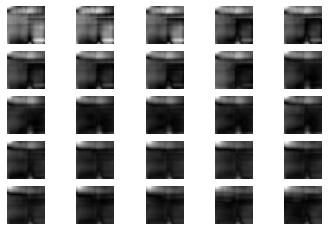

In [84]:
plt.figure()
for i in range(25):
    df_row = np.array(normal_df.iloc[i+25])
    df_row = df_row.reshape(25,25)
    
    plt.subplot(5, 5, i+1) # row col index
    plt.imshow(df_row, cmap='gray')
    plt.axis("off")
plt.show()    
plt.close()

#### Data flow
영상 사이즈(25,25) 기준 144번째 열의 데이터 변화를 나타낸다.

Text(0, 0.5, 'Value')

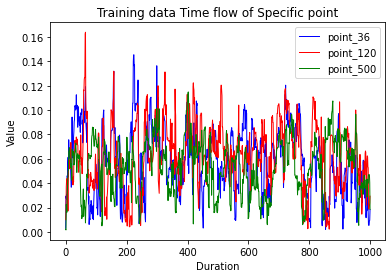

In [98]:
# Add subplots later
fig, ax = plt.subplots()

datas = normal_df.head(1000) # 데이터 200개만

ax.plot(datas[36], label="point_36", color='blue', linewidth=1)
ax.plot(datas[120], label="point_120", color='red', linewidth=1)
ax.plot(datas[500], label="point_500", color='green', linewidth=1)

plt.legend()
plt.title('Training data Time flow of Specific point')
plt.xlabel('Duration')
plt.ylabel('Value')

#### Datas frequnecy
Next, we take a look at the test dataset sensor readings over time.

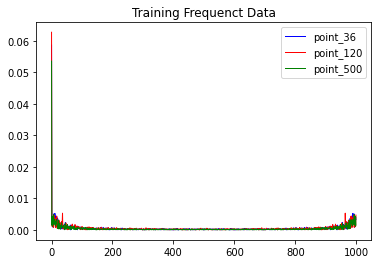

In [97]:
fig, ax = plt.subplots()

fft_36 = tf.signal.fft(datas[36]) / len(datas[36])
fft_120 = tf.signal.fft(datas[120]) / len(datas[120])
fft_500 = tf.signal.fft(datas[500]) / len(datas[500])

ax.plot(np.abs(fft_36), label='point_36', animated=True, color='blue', linewidth=1)
ax.plot(np.abs(fft_120), label='point_120',animated=True, color='red', linewidth=1)
ax.plot(np.abs(fft_500), label='point_500',animated=True, color='green', linewidth=1)

ax.legend()
ax.set_title('Training Frequenct Data')
plt.show()

#### Spliting a dataset

비정상 데이터 수집이 어려운 경우, 비지도학습 방식으로 학습을 하는 것을 선호한다.
따라서 정상데이터를 사용해 모델을 학습시키고 정상과 비정상이 섞인 데이터를 사용해 모델을 검증 및 테스트 하는 방식으로 데이터를 분할하는 방식으로 진행한다.
데이터는 train, val, test 70% 20% 10% 으로 지정한다.

In [31]:
n = len(normal_df)
size = 0.8

normal_train = normal_df.iloc[:int(n*size)] #70%
normal_test = normal_df.iloc[int(n*size):] #30%

abnormal_test = abnormal_df.iloc[int(n*size):] # 변수
total_test = np.vstack((normal_test, abnormal_test))

X_test, X_val, y_test, y_val = train_test_split(total_test, total_test, test_size = 0.5, shuffle=False)

print('train{}, val{}, test{}'.format(normal_train.shape, X_val.shape, X_test.shape))

train(8000, 625), val(2000, 625), test(2000, 625)


#### Standardize (Z-score)

One common standardization mistake is: we normalize the entire data and then split into train-test. This is incorrect. Test data should be completely unseen to anything during the modeling. 

In [32]:
from sklearn.preprocessing import StandardScaler

stder = StandardScaler()
stder.fit(normal_train)

X_train_scaled = stder.transform(normal_train)
X_test_scaled = stder.transform(X_test)
X_val_scaled = stder.transform(X_val)

#### Preparing lstm input data shape 2D -> 3D

In [33]:
X_train_scaled = np.array(normal_train).reshape(-1, 5, 625)
X_val_scaled = np.array(X_val).reshape(-1, 5, 625)
X_test_scaled = np.array(X_test).reshape(-1, 5, 625)

print('train shape is :', X_train_scaled.shape)
print('validation shape is :', X_val_scaled.shape)
print('test shape is :', X_test_scaled.shape)

train shape is : (1600, 5, 625)
validation shape is : (400, 5, 625)
test shape is : (400, 5, 625)


####  Set variable

In [42]:
n_features = X_train_scaled.shape[2]
timesteps = X_train_scaled.shape[1] # 10 Frame
print('n_features: {}, timesteps: {}'.format(n_features, timesteps))

epochs = 1000
batch = 64
lr = 0.0001

n_features: 625, timesteps: 5


#### LSTM Autoencoder training Model

In [43]:
lstm_autoencoder = keras.Sequential()
# Encoder
lstm_autoencoder.add(keras.layers.LSTM(32, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
lstm_autoencoder.add(keras.layers.LSTM(16, activation='relu', return_sequences=False))
lstm_autoencoder.add(keras.layers.RepeatVector(timesteps))
# Decoder
lstm_autoencoder.add(keras.layers.LSTM(16, activation='relu', return_sequences=True))
lstm_autoencoder.add(keras.layers.LSTM(32, activation='relu', return_sequences=True))
lstm_autoencoder.add(keras.layers.TimeDistributed(keras.layers.Dense(n_features)))

lstm_autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 32)             84224     
_________________________________________________________________
lstm_9 (LSTM)                (None, 16)                3136      
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 5, 16)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 5, 16)             2112      
_________________________________________________________________
lstm_11 (LSTM)               (None, 5, 32)             6272      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 625)            20625     
Total params: 116,369
Trainable params: 116,369
Non-trainable params: 0
________________________________________________

#### Optimizer

In [44]:
adam = keras.optimizers.Adam(lr)
lstm_autoencoder.compile(loss='mse', optimizer=adam)

cp = keras.callbacks.ModelCheckpoint(filepath="./lstm_autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)

tb = keras.callbacks.TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

lstm_autoencoder_history = lstm_autoencoder.fit(X_train_scaled, X_train_scaled, 
                                                epochs=epochs, 
                                                batch_size=batch, 
                                                validation_data=(X_val_scaled, X_val_scaled),
                                                verbose=2).history

Epoch 1/1000
25/25 - 3s - loss: 0.0028 - val_loss: 0.0047
Epoch 2/1000
25/25 - 0s - loss: 0.0025 - val_loss: 0.0044
Epoch 3/1000
25/25 - 1s - loss: 0.0023 - val_loss: 0.0041
Epoch 4/1000
25/25 - 0s - loss: 0.0022 - val_loss: 0.0038
Epoch 5/1000
25/25 - 0s - loss: 0.0020 - val_loss: 0.0036
Epoch 6/1000
25/25 - 0s - loss: 0.0018 - val_loss: 0.0033
Epoch 7/1000
25/25 - 0s - loss: 0.0016 - val_loss: 0.0030
Epoch 8/1000
25/25 - 0s - loss: 0.0014 - val_loss: 0.0027
Epoch 9/1000
25/25 - 0s - loss: 0.0012 - val_loss: 0.0024
Epoch 10/1000
25/25 - 0s - loss: 0.0011 - val_loss: 0.0021
Epoch 11/1000
25/25 - 0s - loss: 8.8978e-04 - val_loss: 0.0019
Epoch 12/1000
25/25 - 0s - loss: 7.8998e-04 - val_loss: 0.0019
Epoch 13/1000
25/25 - 0s - loss: 7.2679e-04 - val_loss: 0.0019
Epoch 14/1000
25/25 - 0s - loss: 6.8459e-04 - val_loss: 0.0019
Epoch 15/1000
25/25 - 0s - loss: 6.5295e-04 - val_loss: 0.0019
Epoch 16/1000
25/25 - 0s - loss: 6.2655e-04 - val_loss: 0.0019
Epoch 17/1000
25/25 - 0s - loss: 6.0150e-

Epoch 131/1000
25/25 - 0s - loss: 2.4697e-04 - val_loss: 9.9462e-04
Epoch 132/1000
25/25 - 0s - loss: 2.4664e-04 - val_loss: 9.9255e-04
Epoch 133/1000
25/25 - 0s - loss: 2.4623e-04 - val_loss: 9.9141e-04
Epoch 134/1000
25/25 - 0s - loss: 2.4598e-04 - val_loss: 9.9587e-04
Epoch 135/1000
25/25 - 0s - loss: 2.4559e-04 - val_loss: 9.8746e-04
Epoch 136/1000
25/25 - 0s - loss: 2.4535e-04 - val_loss: 9.8711e-04
Epoch 137/1000
25/25 - 0s - loss: 2.4518e-04 - val_loss: 9.9977e-04
Epoch 138/1000
25/25 - 0s - loss: 2.4495e-04 - val_loss: 9.9914e-04
Epoch 139/1000
25/25 - 0s - loss: 2.4473e-04 - val_loss: 9.8458e-04
Epoch 140/1000
25/25 - 0s - loss: 2.4432e-04 - val_loss: 9.8895e-04
Epoch 141/1000
25/25 - 0s - loss: 2.4407e-04 - val_loss: 0.0010
Epoch 142/1000
25/25 - 0s - loss: 2.4383e-04 - val_loss: 9.8989e-04
Epoch 143/1000
25/25 - 0s - loss: 2.4375e-04 - val_loss: 9.9241e-04
Epoch 144/1000
25/25 - 0s - loss: 2.4349e-04 - val_loss: 9.8995e-04
Epoch 145/1000
25/25 - 0s - loss: 2.4323e-04 - val_l

Epoch 252/1000
25/25 - 0s - loss: 2.1847e-04 - val_loss: 9.0502e-04
Epoch 253/1000
25/25 - 0s - loss: 2.1796e-04 - val_loss: 9.1070e-04
Epoch 254/1000
25/25 - 0s - loss: 2.1749e-04 - val_loss: 9.1422e-04
Epoch 255/1000
25/25 - 0s - loss: 2.1711e-04 - val_loss: 9.0995e-04
Epoch 256/1000
25/25 - 0s - loss: 2.1683e-04 - val_loss: 9.0593e-04
Epoch 257/1000
25/25 - 0s - loss: 2.1625e-04 - val_loss: 8.9194e-04
Epoch 258/1000
25/25 - 0s - loss: 2.1556e-04 - val_loss: 9.1009e-04
Epoch 259/1000
25/25 - 0s - loss: 2.1504e-04 - val_loss: 9.2227e-04
Epoch 260/1000
25/25 - 0s - loss: 2.1456e-04 - val_loss: 9.0920e-04
Epoch 261/1000
25/25 - 0s - loss: 2.1400e-04 - val_loss: 9.1485e-04
Epoch 262/1000
25/25 - 0s - loss: 2.1297e-04 - val_loss: 9.1183e-04
Epoch 263/1000
25/25 - 0s - loss: 2.1223e-04 - val_loss: 9.2801e-04
Epoch 264/1000
25/25 - 0s - loss: 2.1149e-04 - val_loss: 9.3840e-04
Epoch 265/1000
25/25 - 1s - loss: 2.1069e-04 - val_loss: 9.3390e-04
Epoch 266/1000
25/25 - 0s - loss: 2.0964e-04 - v

25/25 - 0s - loss: 1.7333e-04 - val_loss: 5.3936e-04
Epoch 374/1000
25/25 - 0s - loss: 1.7331e-04 - val_loss: 5.5044e-04
Epoch 375/1000
25/25 - 0s - loss: 1.7312e-04 - val_loss: 5.4933e-04
Epoch 376/1000
25/25 - 0s - loss: 1.7309e-04 - val_loss: 5.5122e-04
Epoch 377/1000
25/25 - 0s - loss: 1.7302e-04 - val_loss: 5.4597e-04
Epoch 378/1000
25/25 - 0s - loss: 1.7269e-04 - val_loss: 5.5120e-04
Epoch 379/1000
25/25 - 0s - loss: 1.7261e-04 - val_loss: 5.4364e-04
Epoch 380/1000
25/25 - 0s - loss: 1.7250e-04 - val_loss: 5.4067e-04
Epoch 381/1000
25/25 - 0s - loss: 1.7235e-04 - val_loss: 5.3312e-04
Epoch 382/1000
25/25 - 0s - loss: 1.7254e-04 - val_loss: 5.5037e-04
Epoch 383/1000
25/25 - 0s - loss: 1.7225e-04 - val_loss: 5.4346e-04
Epoch 384/1000
25/25 - 0s - loss: 1.7233e-04 - val_loss: 5.4319e-04
Epoch 385/1000
25/25 - 0s - loss: 1.7223e-04 - val_loss: 5.4443e-04
Epoch 386/1000
25/25 - 0s - loss: 1.7205e-04 - val_loss: 5.4053e-04
Epoch 387/1000
25/25 - 0s - loss: 1.7206e-04 - val_loss: 5.5341

Epoch 494/1000
25/25 - 0s - loss: 1.6422e-04 - val_loss: 5.4913e-04
Epoch 495/1000
25/25 - 0s - loss: 1.6400e-04 - val_loss: 5.6494e-04
Epoch 496/1000
25/25 - 0s - loss: 1.6416e-04 - val_loss: 5.6507e-04
Epoch 497/1000
25/25 - 0s - loss: 1.6397e-04 - val_loss: 5.6127e-04
Epoch 498/1000
25/25 - 0s - loss: 1.6397e-04 - val_loss: 5.3677e-04
Epoch 499/1000
25/25 - 0s - loss: 1.6380e-04 - val_loss: 5.6977e-04
Epoch 500/1000
25/25 - 0s - loss: 1.6383e-04 - val_loss: 5.7142e-04
Epoch 501/1000
25/25 - 0s - loss: 1.6380e-04 - val_loss: 5.7107e-04
Epoch 502/1000
25/25 - 0s - loss: 1.6381e-04 - val_loss: 5.6308e-04
Epoch 503/1000
25/25 - 0s - loss: 1.6361e-04 - val_loss: 5.5619e-04
Epoch 504/1000
25/25 - 0s - loss: 1.6379e-04 - val_loss: 5.4867e-04
Epoch 505/1000
25/25 - 0s - loss: 1.6356e-04 - val_loss: 5.4839e-04
Epoch 506/1000
25/25 - 0s - loss: 1.6341e-04 - val_loss: 5.5047e-04
Epoch 507/1000
25/25 - 0s - loss: 1.6340e-04 - val_loss: 5.5341e-04
Epoch 508/1000
25/25 - 0s - loss: 1.6352e-04 - v

Epoch 615/1000
25/25 - 0s - loss: 1.5803e-04 - val_loss: 5.2862e-04
Epoch 616/1000
25/25 - 0s - loss: 1.5777e-04 - val_loss: 5.3056e-04
Epoch 617/1000
25/25 - 0s - loss: 1.5760e-04 - val_loss: 5.2040e-04
Epoch 618/1000
25/25 - 0s - loss: 1.5762e-04 - val_loss: 5.1881e-04
Epoch 619/1000
25/25 - 0s - loss: 1.5744e-04 - val_loss: 5.1461e-04
Epoch 620/1000
25/25 - 0s - loss: 1.5729e-04 - val_loss: 5.0801e-04
Epoch 621/1000
25/25 - 0s - loss: 1.5722e-04 - val_loss: 5.1330e-04
Epoch 622/1000
25/25 - 0s - loss: 1.5715e-04 - val_loss: 5.1858e-04
Epoch 623/1000
25/25 - 0s - loss: 1.5718e-04 - val_loss: 5.1784e-04
Epoch 624/1000
25/25 - 0s - loss: 1.5715e-04 - val_loss: 5.2163e-04
Epoch 625/1000
25/25 - 0s - loss: 1.5695e-04 - val_loss: 5.1491e-04
Epoch 626/1000
25/25 - 0s - loss: 1.5696e-04 - val_loss: 5.1854e-04
Epoch 627/1000
25/25 - 0s - loss: 1.5689e-04 - val_loss: 5.1436e-04
Epoch 628/1000
25/25 - 0s - loss: 1.5701e-04 - val_loss: 5.1733e-04
Epoch 629/1000
25/25 - 0s - loss: 1.5665e-04 - v

Epoch 736/1000
25/25 - 0s - loss: 1.4948e-04 - val_loss: 5.0120e-04
Epoch 737/1000
25/25 - 0s - loss: 1.4955e-04 - val_loss: 5.0592e-04
Epoch 738/1000
25/25 - 0s - loss: 1.4933e-04 - val_loss: 4.9075e-04
Epoch 739/1000
25/25 - 0s - loss: 1.4930e-04 - val_loss: 4.9666e-04
Epoch 740/1000
25/25 - 0s - loss: 1.4948e-04 - val_loss: 4.9945e-04
Epoch 741/1000
25/25 - 0s - loss: 1.4920e-04 - val_loss: 4.8626e-04
Epoch 742/1000
25/25 - 0s - loss: 1.4929e-04 - val_loss: 5.0715e-04
Epoch 743/1000
25/25 - 0s - loss: 1.4917e-04 - val_loss: 4.8778e-04
Epoch 744/1000
25/25 - 0s - loss: 1.4895e-04 - val_loss: 4.9820e-04
Epoch 745/1000
25/25 - 0s - loss: 1.4901e-04 - val_loss: 4.9110e-04
Epoch 746/1000
25/25 - 0s - loss: 1.4895e-04 - val_loss: 4.8705e-04
Epoch 747/1000
25/25 - 0s - loss: 1.4907e-04 - val_loss: 4.9118e-04
Epoch 748/1000
25/25 - 0s - loss: 1.4898e-04 - val_loss: 4.8427e-04
Epoch 749/1000
25/25 - 0s - loss: 1.4891e-04 - val_loss: 4.8227e-04
Epoch 750/1000
25/25 - 0s - loss: 1.4883e-04 - v

Epoch 857/1000
25/25 - 0s - loss: 1.4638e-04 - val_loss: 4.5463e-04
Epoch 858/1000
25/25 - 0s - loss: 1.4632e-04 - val_loss: 4.4199e-04
Epoch 859/1000
25/25 - 0s - loss: 1.4650e-04 - val_loss: 4.4950e-04
Epoch 860/1000
25/25 - 0s - loss: 1.4652e-04 - val_loss: 4.4370e-04
Epoch 861/1000
25/25 - 0s - loss: 1.4655e-04 - val_loss: 4.5260e-04
Epoch 862/1000
25/25 - 0s - loss: 1.4647e-04 - val_loss: 4.4495e-04
Epoch 863/1000
25/25 - 0s - loss: 1.4640e-04 - val_loss: 4.5397e-04
Epoch 864/1000
25/25 - 0s - loss: 1.4637e-04 - val_loss: 4.5905e-04
Epoch 865/1000
25/25 - 0s - loss: 1.4642e-04 - val_loss: 4.5634e-04
Epoch 866/1000
25/25 - 0s - loss: 1.4661e-04 - val_loss: 4.4702e-04
Epoch 867/1000
25/25 - 0s - loss: 1.4639e-04 - val_loss: 4.4573e-04
Epoch 868/1000
25/25 - 0s - loss: 1.4649e-04 - val_loss: 4.4654e-04
Epoch 869/1000
25/25 - 0s - loss: 1.4618e-04 - val_loss: 4.5036e-04
Epoch 870/1000
25/25 - 0s - loss: 1.4636e-04 - val_loss: 4.4321e-04
Epoch 871/1000
25/25 - 0s - loss: 1.4637e-04 - v

Epoch 978/1000
25/25 - 0s - loss: 1.4503e-04 - val_loss: 4.2768e-04
Epoch 979/1000
25/25 - 0s - loss: 1.4489e-04 - val_loss: 4.1706e-04
Epoch 980/1000
25/25 - 0s - loss: 1.4490e-04 - val_loss: 4.1939e-04
Epoch 981/1000
25/25 - 0s - loss: 1.4500e-04 - val_loss: 4.2082e-04
Epoch 982/1000
25/25 - 0s - loss: 1.4506e-04 - val_loss: 4.1926e-04
Epoch 983/1000
25/25 - 0s - loss: 1.4491e-04 - val_loss: 4.2073e-04
Epoch 984/1000
25/25 - 0s - loss: 1.4483e-04 - val_loss: 4.2149e-04
Epoch 985/1000
25/25 - 0s - loss: 1.4473e-04 - val_loss: 4.2174e-04
Epoch 986/1000
25/25 - 0s - loss: 1.4469e-04 - val_loss: 4.1755e-04
Epoch 987/1000
25/25 - 0s - loss: 1.4470e-04 - val_loss: 4.1908e-04
Epoch 988/1000
25/25 - 0s - loss: 1.4476e-04 - val_loss: 4.1190e-04
Epoch 989/1000
25/25 - 0s - loss: 1.4465e-04 - val_loss: 4.2022e-04
Epoch 990/1000
25/25 - 0s - loss: 1.4477e-04 - val_loss: 4.0556e-04
Epoch 991/1000
25/25 - 0s - loss: 1.4506e-04 - val_loss: 4.2196e-04
Epoch 992/1000
25/25 - 0s - loss: 1.4508e-04 - v

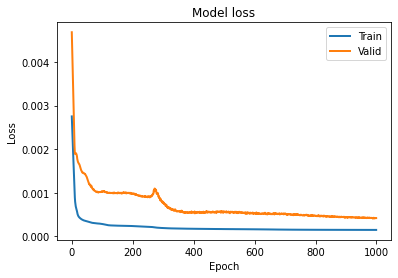

In [45]:
plt.plot(lstm_autoencoder_history['loss'], linewidth=2, label='Train')
plt.plot(lstm_autoencoder_history['val_loss'], linewidth=2, label='Valid')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#### Loss Distribution
By plotting the distribution of the calculated loss in the training set, we can determine a suitable threshold value for identifying an anomaly. In doing this, one can make sure that this threshold is set above the “noise level” so that false positives are not triggered.


In [70]:
# val 데이터 입력 (데이터 재구성)
pre = lstm_autoencoder.predict(X_val_scaled)
pre = pre.reshape(pre.shape[0]*timesteps, n_features)

x_val = X_val_scaled.reshape(X_val_scaled.shape[0]*timesteps, n_features)

# 재구성 손실 값 도출 (입력 데이터와 재구성 결과와의 차이)
mse = np.mean(np.power(x_val - pre, 2), axis = 1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_val.tolist()})

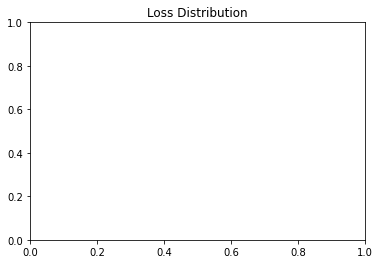

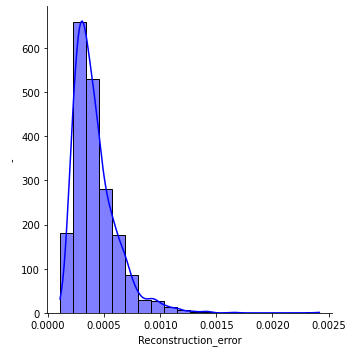

In [99]:
plt.figure()

plt.title("Loss Distribution")
sns.displot(error_df['Reconstruction_error'], bins=20, kde=True, color='blue')
plt.xlabel("Reconstruction_error")
plt.ylabel("-")
plt.show()

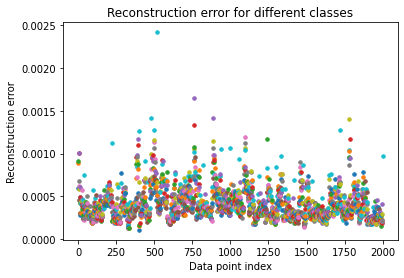

In [72]:
groups = np.array(error_df['Reconstruction_error'])

fig, ax = plt.subplots()

for index, group in enumerate(groups):
    ax.plot(index, group, marker='o', ms=3.5, linestyle='')
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

Based on the above loss distribution, let’s try a threshold value of 0.275 for flagging an anomaly. We then calculate the reconstruction loss in the training and test sets to determine when the sensor readings cross the anomaly threshold.

In [78]:
pre_test = lstm_autoencoder.predict(X_test_scaled)
pre_test = pre_test.reshape(pre_test.shape[0]*timesteps, n_features)

x_test = X_test_scaled.reshape(X_test_scaled.shape[0]*timesteps, n_features)

mse_test = np.mean(np.power(x_test - pre_test, 2), axis = 1)

scored = pd.DataFrame({'Loss_mse': mse_test})
scored['Threshold'] = 0.0025
scored['Anomaly'] = scored['Loss_mse'] > scored['Threshold']
scored.head()

,Loss_mse,Threshold,Anomaly
0,0.000102,0.0025,False
1,0.000120,0.0025,False
2,0.000074,0.0025,False
3,0.000071,0.0025,False
4,0.000106,0.0025,False


<AxesSubplot:>

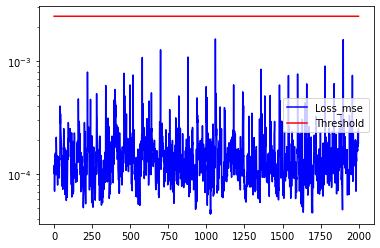

In [80]:
scored.plot(logy=True, color=['blue', 'red'])

### reference
how to get a specific row in pandas </br>
https://www.geeksforgeeks.org/get-a-specific-row-in-a-given-pandas-dataframe/
</br>
Tensorflow forcasting tutorial</br>
https://www.tensorflow.org/tutorials/structured_data/time_series?hl=ko
</br>
lstm ae </br>
https://github.com/cran2367/lstm_autoencoder_classifier/blob/master/lstm_autoencoder_classifier.ipynb
</br>
MultiLabelBinarizer</br>
https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.preprocessing.multilabelbinarizer#sklearn.preprocessing.MultiLabelBinarizer
</br>
Anomaly Detection </br>
https://towardsdatascience.com/lstm-autoencoder-for-anomaly-detection-e1f4f2ee7ccf
</br>
Loss Function mae, mse </br>
https://wiserloner.tistory.com/1041